In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pacote de K-medias
from sklearn.cluster import KMeans 

## Criando variáveis aleatórias

In [3]:
# Criando as médias e as matrizes de variância-covarância 
mean1, cov1 = [1,3], [[1,0.5],[0.5,1]]
mean2, cov2 = [6,8], [[1,-0.2],[-0.2,0.5]]
mean3, cov3 = [12,1], [[1,0],[0,0.5]]
mean4, cov4 = [14,6], [[2,-0.2],[-0.2,2]]


# Criando a mixtira de 4 distribuições normais
a = np.random.multivariate_normal(mean1,cov1,size=200)
b = np.random.multivariate_normal(mean2,cov2,size=200)
c = np.random.multivariate_normal(mean3,cov3,size=200)
d = np.random.multivariate_normal(mean4,cov4,size=200)


# Criando X e embaralhando
X = np.concatenate((a,b,c,d))
np.random.shuffle(X)

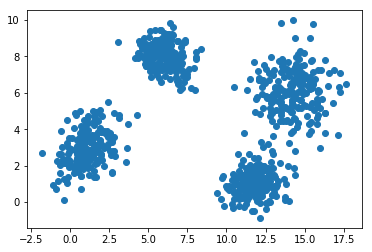

In [4]:
# Look at the scatter plot
plt.scatter(X[:,0], X[:,1])

## Algoritmo de k-medias

In [5]:
k=4
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)

In [6]:
print(y_pred.min())
print(y_pred.max())
print(len(y_pred))
y_pred

0
3
800


array([1, 3, 2, 3, 1, 2, 1, 2, 1, 3, 0, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 0, 2, 3, 1, 1, 0, 1, 3, 3, 3, 1, 2, 2,
       1, 3, 0, 2, 2, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 3, 1, 3,
       2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 3, 1, 3, 0, 3, 2, 0, 2, 0, 1, 2, 1, 1, 0, 3, 1, 3, 3, 0, 3, 2,
       3, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2,
       3, 3, 1, 0, 1, 3, 2, 3, 3, 0, 0, 3, 3, 0, 2, 3, 2, 3, 0, 3, 2, 0,
       0, 0, 0, 1, 0, 0, 1, 3, 2, 0, 1, 2, 2, 3, 1, 0, 1, 3, 0, 3, 1, 3,
       0, 0, 2, 1, 1, 3, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 3, 2, 2, 3, 0,
       2, 3, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 0, 1, 3, 2, 2, 0, 1, 1, 2, 3,
       1, 3, 2, 0, 2, 3, 1, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 2, 1, 3,
       3, 3, 3, 0, 3, 2, 1, 0, 2, 3, 0, 2, 1, 2, 1, 1, 0, 2, 1, 3, 2, 3,
       2, 3, 2, 1, 0, 2, 1, 3, 0, 0, 3, 0, 3, 3, 1, 3, 3, 3, 3, 2, 2, 0,
       1, 3, 2, 3, 0, 3, 0, 2, 1, 2, 0, 1, 3, 2, 1,

## Investigando os centroides

In [7]:
kmeans.cluster_centers_

array([[ 1.05984958,  2.91185242],
       [14.24383191,  6.11508304],
       [ 6.00474542,  8.03425851],
       [11.83928195,  1.06568785]])

## Custo - Soma dos quadrados dos grupos
* Custo é a soma das distâncias dos pontos até o centróide do grupo.

In [8]:
soma_quadrados = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    soma_quadrados.append(kmeans.inertia_)


In [9]:
soma_quadrados

[28466.61651761104,
 9775.185741860165,
 4706.2085683557625,
 1580.338220596217,
 1360.905555661679,
 1183.2494920823324,
 1036.3686366108946,
 929.4745293549311,
 820.6056819608405,
 756.2943661136281,
 707.3104451212579,
 656.4220691338859]

# Médodo da Quina

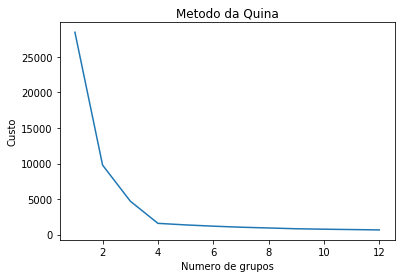

In [10]:
plt.plot(range(1, 13), soma_quadrados)
plt.title('Metodo da Quina')
plt.xlabel('Numero de grupos')
plt.ylabel('Custo')
plt.show()

# Gráfico com os centróides

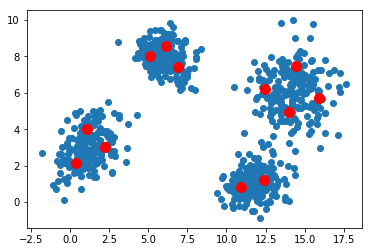

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

### Vamos escolher k=4

In [12]:
k=4
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)

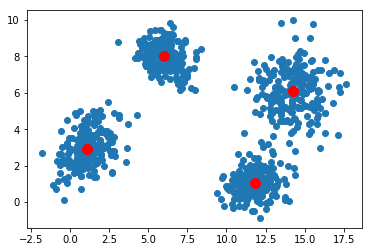

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()